In [17]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [18]:
graph = nx.DiGraph()
graph.add_edges_from([("root", "a"), ("a", "b"), ("a", "e"), ("b", "c"), ("b", "d"), ("d", "e")])

In [19]:
graph

In [47]:
def create_dag(num_nodes: int, edge_prob: float, seed=1):
    graph = nx.gnp_random_graph(n=num_nodes, p=edge_prob, seed=seed, directed=True)
    dag = nx.DiGraph([(u, v, {}) for (u, v) in graph.edges() if u < v])
    return dag

dag = create_dag(4, 0.6, 1)

In [122]:
# Parameters
graph = dag

NUM_NODES = graph.number_of_nodes()
MIN_DISCRETE_VALUES = 2
MAX_DISCRETE_VALUES = 5

sorted_graph = list(nx.topological_sort(graph))

In [123]:
# Supporting arrays
samples = np.empty(NUM_NODES).astype(int)
num_discrete_values = np.empty(NUM_NODES).astype(int)
matrices = np.empty(NUM_NODES).astype(object)
sorted_graph = list(nx.topological_sort(graph))

In [124]:
# generate number of discrete values per node
for node in sorted_graph:
    num_discrete_values[node] = np.random.randint(MIN_DISCRETE_VALUES, MAX_DISCRETE_VALUES)

In [125]:
# create matrices for nodes
for node in sorted_graph:
    parents = list(graph.predecessors(node))
    has_parents = len(parents) != 0

    # Generate matrix for node
    num_values_parents = num_discrete_values[parents]
    num_distributions = num_values_parents.prod() if has_parents else 1
    value_distribution = np.ones(num_discrete_values[node]) # create array with ones for uniformally distribution
    
    matrix = np.random.dirichlet(value_distribution, num_distributions)
    matrix_shape = np.append(num_values_parents, num_discrete_values[node])
    matrix = matrix.reshape(matrix_shape)
    matrices[node] = matrix

In [126]:
# Data sampling

for node in sorted_graph:
    parents = list(graph.predecessors(node))
    has_parents = len(parents) != 0
    
    results_of_parents = samples[parents]
    matrix = matrices[node]
    
    # Get prob vector by list of indexes
    prob_vector = matrix
    for index in results_of_parents:
        prob_vector = prob_vector[index]
        
    
    #prob_vector = [matrix[results_of_parents]] if has_parents else matrix
    print(f"--------------------------------")
    print(f"{matrix}\n\n")
    print(f"Chosen {results_of_parents}")
    print(f"{prob_vector}\n\n")
    
    sample = np.random.choice(num_discrete_values[node], 1, p=prob_vector)
    samples[node] = sample
    

--------------------------------
[0.41590107 0.013172   0.43995658 0.13097035]


Chosen []
[0.41590107 0.013172   0.43995658 0.13097035]


--------------------------------
[[0.79044317 0.20955683]
 [0.14298881 0.85701119]
 [0.14217937 0.85782063]
 [0.74125635 0.25874365]]


Chosen [0]
[0.79044317 0.20955683]


--------------------------------
[[0.54303785 0.13909823 0.00760988 0.31025404]
 [0.08070035 0.46536676 0.10079364 0.35313925]]


Chosen [1]
[0.08070035 0.46536676 0.10079364 0.35313925]


--------------------------------
[[[0.28350524 0.48329426 0.2332005 ]
  [0.65842626 0.0521924  0.28938134]
  [0.27989173 0.55738999 0.16271828]
  [0.58648793 0.2405164  0.17299568]]

 [[0.73642238 0.08569676 0.17788087]
  [0.3857199  0.33603137 0.27824873]
  [0.60593088 0.17219148 0.22187764]
  [0.10490914 0.69957112 0.19551973]]]


Chosen [1 1]
[0.3857199  0.33603137 0.27824873]




In [127]:
print(f"Number nodes: {NUM_NODES}")
for node in list(nx.topological_sort(graph)):
    print()
    print("-------------------------")
    print()
    print(f"Node: {node}")
    print(f"Sample: ")
    print()
    print(f"{samples[node]}")
    print()
    print(f"Number parents: {len(list(graph.predecessors(node)))}" )
    print(f"Parents number of possible discrete values: {num_discrete_values[list(graph.predecessors(node))]} ")
    print(f"Sample: {samples[node]}")
    print(f"Number of possible discrete values: {num_discrete_values[node]}" )
    #print(f"Matrix shape: {matrices[node].shape}")
    print(f"Matrix:")
    print()
    print(matrices[node])
    print()

Number nodes: 4

-------------------------

Node: 0
Sample: 

0

Number parents: 0
Parents number of possible discrete values: [] 
Sample: 0
Number of possible discrete values: 4
Matrix:

[0.41590107 0.013172   0.43995658 0.13097035]


-------------------------

Node: 1
Sample: 

1

Number parents: 1
Parents number of possible discrete values: [4] 
Sample: 1
Number of possible discrete values: 2
Matrix:

[[0.79044317 0.20955683]
 [0.14298881 0.85701119]
 [0.14217937 0.85782063]
 [0.74125635 0.25874365]]


-------------------------

Node: 2
Sample: 

1

Number parents: 1
Parents number of possible discrete values: [2] 
Sample: 1
Number of possible discrete values: 4
Matrix:

[[0.54303785 0.13909823 0.00760988 0.31025404]
 [0.08070035 0.46536676 0.10079364 0.35313925]]


-------------------------

Node: 3
Sample: 

0

Number parents: 2
Parents number of possible discrete values: [2 4] 
Sample: 0
Number of possible discrete values: 3
Matrix:

[[[0.28350524 0.48329426 0.2332005 ]
  [0.6584

In [128]:
value_distribution = np.ones(3)
s = np.random.dirichlet(value_distribution, 3 * 5)
s = s.reshape((3,5,3))
s


parents = list(graph.predecessors(node))

array([[0.33336235, 0.33335647, 0.3332597 , 0.33343525, 0.33403599,
        0.33329866, 0.33322871, 0.33308961, 0.33376739, 0.33378719,
        0.33375394, 0.33311812, 0.33114226, 0.33235715, 0.33531783,
        0.33361963, 0.33413947, 0.33248932, 0.33423796, 0.33379393],
       [0.33219724, 0.3334011 , 0.33186585, 0.33296851, 0.33398097,
        0.33395754, 0.33383263, 0.33491247, 0.33365363, 0.3320627 ,
        0.33289968, 0.33447494, 0.33268459, 0.33441131, 0.33320251,
        0.33335982, 0.33337825, 0.33397369, 0.3323723 , 0.3326438 ],
       [0.33444042, 0.33324243, 0.33487446, 0.33359624, 0.33198304,
        0.3327438 , 0.33293866, 0.33199792, 0.33257898, 0.33415011,
        0.33334638, 0.33240694, 0.33617316, 0.33323155, 0.33147966,
        0.33302055, 0.33248228, 0.33353699, 0.33338974, 0.33356227]])

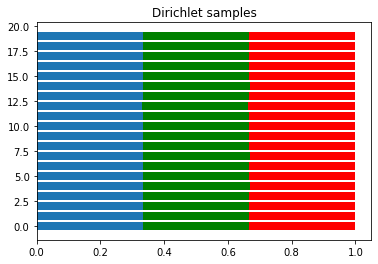

In [129]:
#np.random.dirichlet((5, 1, 1), 20)

n = 20
beta = 1

s = np.random.dirichlet(np.array([100000, 100000, 100000]) * beta, n).transpose()
plt.barh(range(n), s[0])
plt.barh(range(n), s[1], left=s[0], color='g')
plt.barh(range(n), s[2], left=s[0]+s[1], color='r')

plt.title("Dirichlet samples")

s

In [250]:
 print(np.random.choice(5, 3, p=[0.1, 0, 0.3, 0.6, 0]))

[3 2 2]


In [103]:
[1, 1, 1] * beta

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

array([[0.35525811, 0.37990413, 0.26483775]])